In [47]:
INPUT_FILE = '../data/processed/enriched_df.csv'
META_DATA = '../data/raw/meta_data.csv'
CHOROPLETH_DATA_FILE = '../data/processed/choropleth_df.csv'
RAW = '../data/raw/who_suicide_statistics.csv'

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in data

In [40]:
df = pd.read_csv(INPUT_FILE)

In [41]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [34]:
df[df["population"] == 0]

,year,sex,country,suicides_no,population,"suicides per 100,000",code


## Plot some graphs

In [60]:
df = pd.read_csv(CHOROPLETH_DATA_FILE)
df.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Austria,0.0,3742700.0,0.00,AUT
3,1979,female,Bahamas,0.0,95800.0,0.00,BHS
4,1979,female,Barbados,0.0,119800.0,0.00,BRB


### Make some plots

Have table with 
* top highest male suicide rate ever (show country, year male suicide rate)
* same for female
* same for overall

Then another table with 
* top mean overall suicide rate, show mean and stdev, and country
* save for male
* same for female

In [69]:
both = df.groupby(['year', 'country']).agg(population = pd.NamedAgg(column="population", aggfunc=sum), 
                                                 suicides_no = pd.NamedAgg(column="suicides_no", aggfunc=sum), 
                                                 code = pd.NamedAgg(column="code", aggfunc=lambda x: x[0]),
                                                ).reset_index()
females = df[df["sex"] == "female"]
males = df[df["sex"] == "male"]
both.loc[both["population"] == 0, "population"] = np.nan
both["suicides per 100,000"] = both['suicides_no'] / both['population'] * 100000 

In [70]:
males.sort_values(by="suicides per 100,000", ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
2633,1994,male,Lithuania,1438.0,1594020.0,90.21,LTU
3013,1996,male,Lithuania,1388.0,1577778.0,87.97,LTU
2825,1995,male,Lithuania,1388.0,1585526.0,87.54,LTU
4301,2002,male,Lithuania,1309.0,1520461.0,86.09,LTU
3209,1997,male,Lithuania,1348.0,1570754.0,85.82,LTU
3833,2000,male,Lithuania,1317.0,1542706.0,85.37,LTU
3614,1999,male,Lithuania,1285.0,1552914.0,82.75,LTU
3408,1998,male,Lithuania,1285.0,1562853.0,82.22,LTU
4066,2001,male,Lithuania,1255.0,1531211.0,81.96,LTU
2452,1993,male,Lithuania,1287.0,1602155.0,80.33,LTU


In [71]:
females.sort_values(by="suicides per 100,000", ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
1099,1986,female,Monaco,6.0,1.473025e+04,40.73,MCO
279,1981,female,Hungary,1586.0,5.134500e+06,30.89,HUN
24,1979,female,Hungary,1464.0,5.084900e+06,28.79,HUN
138,1980,female,Hungary,1462.0,5.112100e+06,28.60,HUN
601,1983,female,Hungary,1455.0,5.167900e+06,28.15,HUN
444,1982,female,Hungary,1442.0,5.153600e+06,27.98,HUN
1083,1986,female,Hungary,1424.0,5.186000e+06,27.46,HUN
756,1984,female,Hungary,1414.0,5.178500e+06,27.31,HUN
785,1984,female,Sri Lanka,1829.0,6.696000e+06,27.31,LKA
635,1983,female,Sri Lanka,1807.0,6.616000e+06,27.31,LKA


In [72]:
both.sort_values(by="suicides per 100,000", ascending=False).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
1483,1996,Lithuania,3375163.0,1722.0,LTU,51.019758
1391,1995,Lithuania,3387149.0,1694.0,LTU,50.012562
1295,1994,Lithuania,3400730.0,1700.0,LTU,49.989267
317,1983,Hungary,9969100.0,4906.0,HUN,49.212065
1889,2000,Lithuania,3315125.0,1631.0,LTU,49.198748
156,1981,Hungary,9908700.0,4871.0,HUN,49.158820
393,1984,Hungary,9986500.0,4900.0,HUN,49.066239
82,1980,Hungary,9866500.0,4797.0,HUN,48.619065
1580,1997,Lithuania,3364273.0,1632.0,LTU,48.509737
24,1979,Hungary,9828100.0,4767.0,HUN,48.503780


Look at more recent years

In [73]:
both.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
3490,2014,Lithuania,2781577.0,930.0,LTU,33.434271
3513,2014,Republic of Korea,48465917.0,13834.0,PRK,28.543770
3530,2014,Suriname,497701.0,128.0,SUR,25.718253
3479,2014,Hungary,9412788.0,1925.0,HUN,20.450901
3485,2014,Japan,120274000.0,24357.0,JPN,20.251260
3486,2014,Kazakhstan,15428844.0,3119.0,KAZ,20.215384
3489,2014,Latvia,1894041.0,382.0,LVA,20.168518
3527,2014,Slovenia,1951786.0,388.0,SVN,19.879229
3518,2014,Russian Federation,134713962.0,26541.0,RUS,19.701744
3538,2014,Ukraine,40464165.0,7968.0,UKR,19.691497


In [74]:
males.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
7033,2014,male,Lithuania,769.0,1273877.0,60.37,LTU
7056,2014,male,Republic of Korea,9735.0,24194012.0,40.24,PRK
7073,2014,male,Suriname,92.0,249232.0,36.91,SUR
7032,2014,male,Latvia,311.0,862754.0,36.05,LVA
6991,2014,male,Belarus,1465.0,4112945.0,35.62,BLR
7061,2014,male,Russian Federation,21886.0,61936914.0,35.34,RUS
7029,2014,male,Kazakhstan,2556.0,7393150.0,34.57,KAZ
7081,2014,male,Ukraine,6412.0,18595916.0,34.48,UKR
7070,2014,male,Slovenia,325.0,964842.0,33.68,SVN
7011,2014,male,Estonia,193.0,577352.0,33.43,EST


In [75]:
females.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
6952,2014,female,Republic of Korea,4099.0,24271905.0,16.89,PRK
6969,2014,female,Suriname,36.0,248469.0,14.49,SUR
6924,2014,female,Japan,7537.0,61879000.0,12.18,JPN
6929,2014,female,Lithuania,161.0,1507700.0,10.68,LTU
6888,2014,female,Belgium,561.0,5389207.0,10.41,BEL
6955,2014,female,Rodrigues,2.0,19420.0,10.30,MUS
6917,2014,female,Hong Kong SAR,363.0,3756900.0,9.66,CHN
6918,2014,female,Hungary,447.0,4946198.0,9.04,HUN
6898,2014,female,Croatia,186.0,2091949.0,8.89,HRV
6970,2014,female,Sweden,363.0,4570064.0,7.94,SWE


# Create plot with top 5 overall suicides in 2014 and show over all years
# and do some with top 5 overall and show over all years
# and do also with lowest ones

# TODO: 
* find unique top 5 overall countries (so different ones) and plot them, use country name as hue
* somewhere, also for further analyses when doing mean and std, I need to filter out at the very least the zeros (e.g. lithuania had a 0 suicide number somewhere which seems missing data), and maybe also the very bad outliers
* Show, for Lithuania as well as the overall lowest country (or if that's weird country pick the overall lowest in Europe), the distribution over the age ranges. Be careful with calculating the rate per 100,000
* Then start using the meta data, give some statistics and stuff
* Then get extra data and do some machine learning... Can do a happiness data correlation plot I guess, and then try to predit suicide rate with a whole bunch of statistics

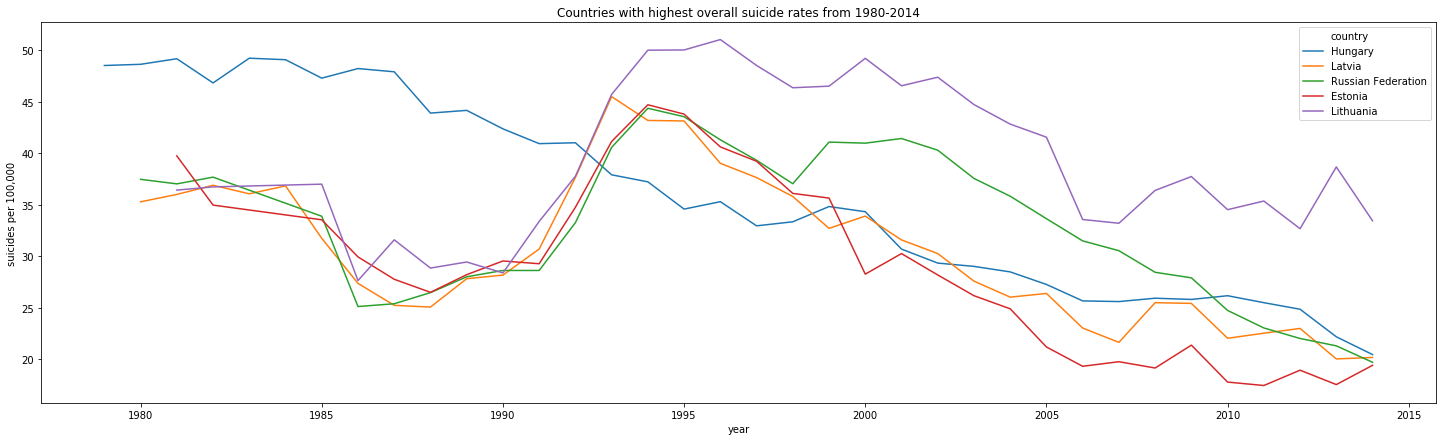

In [130]:
# pick countries with higest overall suicide rate per 100,000 in any year
top_countries_overall = both.sort_values(by="suicides per 100,000", ascending=False).drop_duplicates(subset=["country"], keep='first')
top_countries_overall = top_countries_overall.iloc[:5]["country"]

sample = both.loc[both["country"].isin(top_countries_overall), :]
sample.loc[sample["suicides per 100,000"] == 0, "suicides per 100,000"] = np.nan


fig = plt.figure(figsize=(25,7))
plt.title("Countries with highest overall suicide rates from 1980-2014")
sns.lineplot(x="year", y="suicides per 100,000", data=sample, hue="country");

# TODO: maybe have a way to quantify host much data is missing from these... If there is lots of missing data from a plot maybe don't consider it?? Or maybe only take into account countries with population higher than XX to make it less noisy

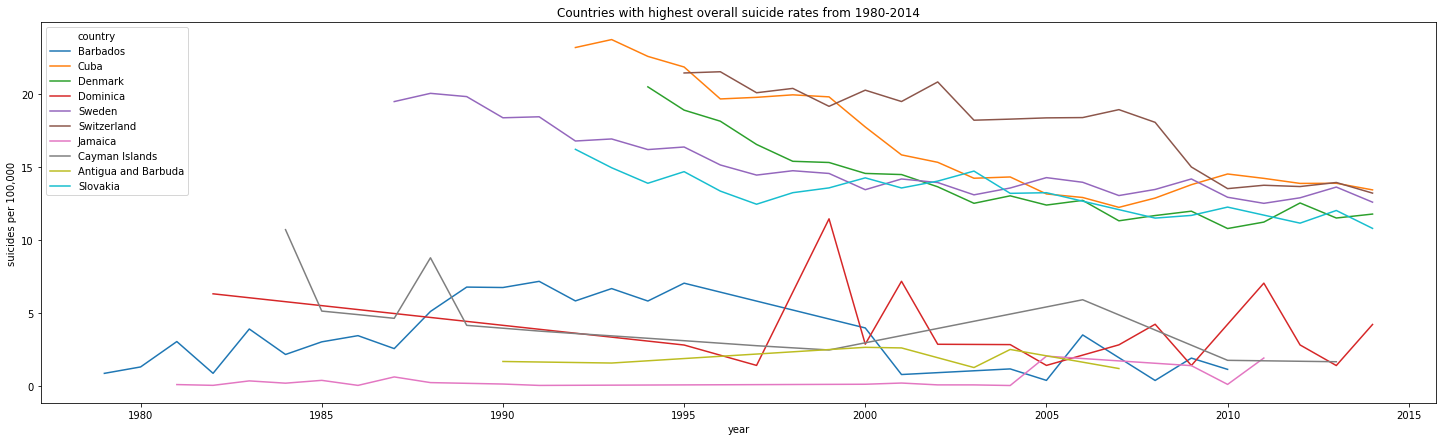

In [133]:
bottom_countries_overall = both.sort_values(by="suicides per 100,000", ascending=True).drop_duplicates(subset=["country"], keep='first')
bottom_countries_overall = bottom_countries_overall.iloc[:10]["country"]

sample = both.loc[both["country"].isin(bottom_countries_overall), :]
sample.loc[sample["suicides per 100,000"] == 0, "suicides per 100,000"] = np.nan


fig = plt.figure(figsize=(25,7))
plt.title("Countries with highest overall suicide rates from 1980-2014")
sns.lineplot(x="year", y="suicides per 100,000", data=sample, hue="country");

In [77]:
def plot_stats(data_frame):
    
    countries = ["France", "Belgium", "Norway", "Netherlands", "Spain"]
    
    
    # df = data_frame[data_frame["country"] == country].reset_index()
    df = data_frame[data_frame["country"].isin(countries)].reset_index()

    df["per_100000"] = df["per_100000"].replace(0, np.nan)
    
    
    if len(df) == 0:
        print(f"Country {country} not present in dataframe, returning nothing")
        return 
    
    plt.figure(figsize=(20,8))
    
#     sns.lineplot(x="year", y="suicides_no", hue="sex",
#              style="sex", data=df, markers=True, color="k")
    
#     ax2 = plt.twinx()
    
    sns.lineplot(x="year", y="per_100000", style="sex", hue="country", data=df, color="r", markers=True)
    plt.ylabel("suicides per 100,000", fontsize=20)
    plt.xlabel("year", fontsize=20)
    


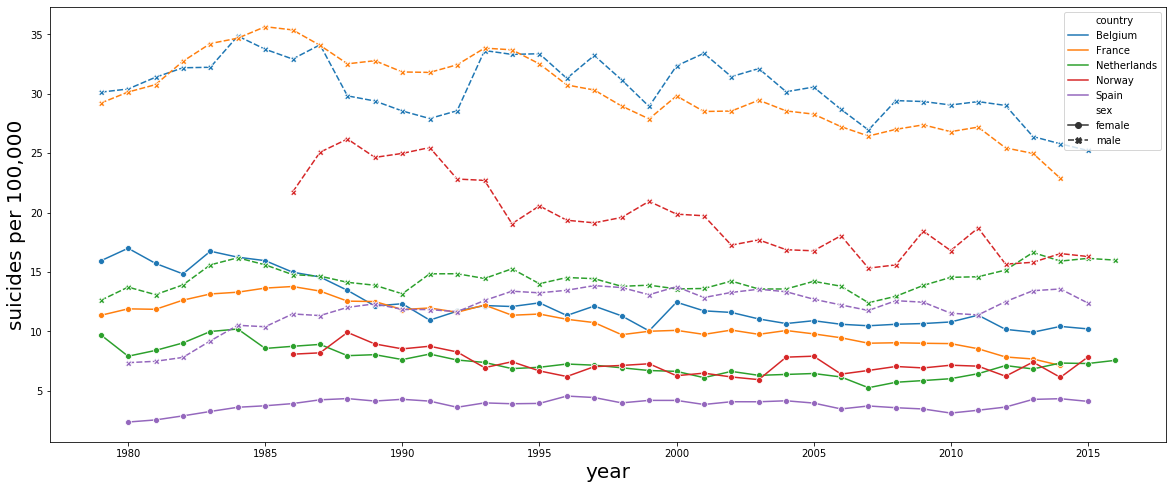

In [78]:
plot_stats(df_suicides)

## TODO: 
* Look at top highest suicides per 100,000 and top lowest, show those in plots
* also show the one with biggest difference in male and female suicides
* show plot with map of world, countries coloured in (can use plotly I guess) by how many suicides per 100,000 and can have widget for which year -- would be awesome plot. 
* this would be amazing https://community.plot.ly/t/trouble-with-converting-offline-animation-to-online/19129/2 (choropleth timeseries)

In [82]:
def plot_stats(data_frame):
    
    countries = ["Japan", "Greece", "Singapore"]
    
    
    # df = data_frame[data_frame["country"] == country].reset_index()
    df = data_frame[data_frame["country"].isin(countries)].reset_index()

    df["per_100000"] = df["per_100000"].replace(0, np.nan)
    
    
    if len(df) == 0:
        print(f"Country {country} not present in dataframe, returning nothing")
        return 
    
    plt.figure(figsize=(20,8))
    
#     sns.lineplot(x="year", y="suicides_no", hue="sex",
#              style="sex", data=df, markers=True, color="k")
    
#     ax2 = plt.twinx()
    
    sns.lineplot(x="year", y="per_100000", style="sex", hue="country", data=df, color="r", markers=True)
    plt.ylabel("suicides per 100,000", fontsize=20)
    plt.xlabel("year", fontsize=20)
    

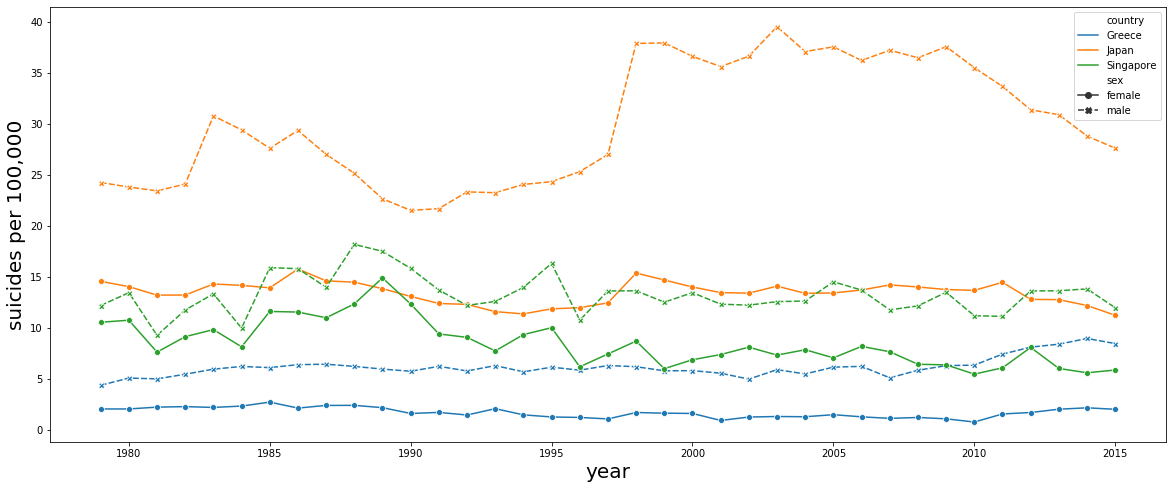

In [83]:
plot_stats(df_suicides)

(array([15., 18.,  3.,  0.,  0.,  0.,  1.,  7., 17., 11.]),
 array([2220. , 2887.8, 3555.6, 4223.4, 4891.2, 5559. , 6226.8, 6894.6,
        7562.4, 8230.2, 8898. ]),
 <a list of 10 Patch objects>)

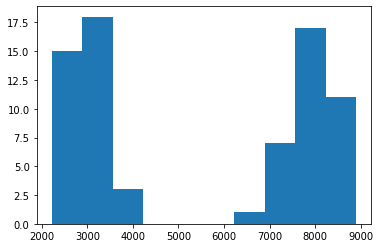

In [80]:
plt.hist((df_suicides.loc[df_suicides['country'] == 'France'])["suicides_no"])

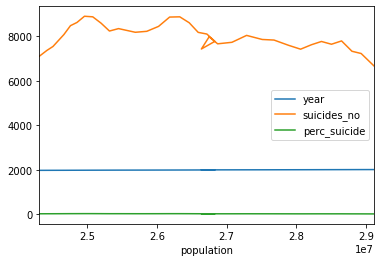

In [34]:
#@interact
#def plot_suicides_over_years(country=widgets.Dropdown(options=df.country.value_counts().index.sort_values())):


sub = (df_suicides.loc[df_suicides['country'] == 'France'])#.reset_index()
males = sub.loc[sub['sex'] == 'male']
females = sub.loc[sub['sex'] == 'female']
sub.index = sub['year']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


males.plot('population')
#ax.plot(males['population'])
#ax.plot(females['population'])





#both = sub.pivot(columns='sex', values=['suicides_no', 'population'], index='year').reset_index()
#print(sub.head())
#suicide_num = sub.pivot(columns='sex', values=['suicides_no', 'population', 'perc_suicide'], index='year')
#population = sub.pivot(columns='sex', values=['population'], index='year')
#suicide_num.iplot(suicide_num[['suicides_no', 'population']], secondary_y = ['perc_suicide'])
#print(both.head())
#both.iplot(kind='line', secondary_y = ['male'])
#population.iplot(kind='line')

#fig.update_layout(yaxis_type="log")

In [21]:
import plotly

In [78]:
df_suicides.columns

Index(['suicides_no', 'population'], dtype='object')

In [52]:
test = pd.DataFrame(df_suicides) #.head()

In [53]:
test.head()

,year,sex,country,suicides_no
0,1979,female,Argentina,508.0
1,1979,female,Australia,479.0
2,1979,female,Austria,0.0
3,1979,female,Bahamas,0.0
4,1979,female,Barbados,0.0


In [77]:
df[df['country'] == 'Austria'].groupby(['year', 'sex']).sum()

suicides_no  population
year sex                            
1979 female          0.0   3742700.0
     male            0.0   3321500.0
1980 female        590.0   3743200.0
     male         1342.0   3328600.0
1981 female        595.0   3776400.0
...                  ...         ...
2014 male          990.0   3969038.0
2015 female        290.0   4201798.0
     male          961.0   4017588.0
2016 female        297.0   4241056.0
     male          907.0   4078155.0

[76 rows x 2 columns]

In [68]:
test2 = df[df['country'] == 'France'].groupby(['year', 'sex']).sum().reset_index()

In [70]:
test2.head()

,year,sex,suicides_no,population
0,1979,female,2891.0,25492100.0
1,1979,male,7102.0,24313200.0
2,1980,female,3044.0,25605100.0
3,1980,male,7362.0,24421100.0
4,1981,female,3045.0,25697100.0


In [74]:
test2.pivot(columns='sex', values=['suicides_no', 'population'], index='year').head()

suicides_no          population            
sex       female    male      female        male
year                                            
1979      2891.0  7102.0  25492100.0  24313200.0
1980      3044.0  7362.0  25605100.0  24421100.0
1981      3045.0  7541.0  25697100.0  24509100.0
1982      3287.0  8074.0  26045800.0  24664900.0
1983      3439.0  8475.0  26168200.0  24759700.0

In [66]:
@interact
def plot_suicides_over_years(country=widgets.Dropdown(options=['France', 'Argentina'])):
    sub = test.loc[test['country'] == country]
    
    sub = sub.pivot(columns='sex', values='suicides_no', index='year')
    print(sub.head())
    sub.iplot(kind='line')

interactive(children=(Dropdown(description='country', options=('France', 'Argentina'), value='France'), Output…

In [50]:
df_suicides = test.pivot(columns=['sex', 'country'], values='suicides_no')
df_suicides.head()

KeyError: "None of [Index(['sex', 'country'], dtype='object')] are in the [columns]"

In [32]:
df_suicides.iplot(kind='bar')